# Using Seasonal Flu as a Predictor Value for H1N1
Using GridsearchCV for Logistic Regression, multinomial Naive Bayes, <em>k</em>-NN, and Random Forest classifiers to build a model maximizing AUROC. Uses a true seasonal vaccine value to see the effect on H1N1 predictions.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Setting up data

In [2]:
#read in data
data = pd.read_csv('../data/train_clean.csv', index_col='respondent_id')

In [8]:
cols = list(data.select_dtypes('object').columns)

In [10]:
data = pd.get_dummies(data=data, columns=cols, drop_first=True)

In [12]:
#Set up variables
X2 = data.drop(columns=['h1n1_vaccine'])
y_h1n1 = data['h1n1_vaccine']

In [23]:
#Setting up pipelines and parameters
pipe_log = Pipeline([
    ('log', LogisticRegression(max_iter=5000))
])

pipe_mnb = Pipeline([
    ('mnb', MultinomialNB())
])

pipe_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

pipe_rfc = Pipeline([
    ('rfc', RandomForestClassifier())
])

log_par = {
    'log__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'log__solver': ['liblinear', 'lbfgs'],
    'log__penalty': ['l1', 'l2']
}

mnb_par = {
}

knn_par = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2, 3],
}
    
rfc_par = {
    'rfc__n_estimators': [50, 100, 150, 200],
    'rfc__max_depth': [None, 1, 2, 3, 4, 5, 15, 30],
    'rfc__max_features':['auto', 'sqrt', 'log2', None],
    'rfc__min_samples_split': [1, 2, 5, 10, 15, 100],
    'rfc__min_samples_leaf': [1, 2, 5, 10]
}

### Models for H1N1

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_h1n1, random_state=42, stratify = y_h1n1)

In [35]:
gsl2 = GridSearchCV(pipe_log, param_grid = log_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [36]:
gsl2.fit(X_train2, y_train2)

C:\Users\fusio\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.89142521        nan 0.89143102 0.89143541 0.89147996        nan
 0.89145113 0.89145448 0.8917961         nan 0.89156771 0.89160041
 0.89184534        nan 0.89049132 0.89192787 0.88129036        nan
 0.87955417 0.88849363 0.5169714         nan 0.83179397 0.8615408 ]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'log__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [37]:
gsm2 = GridSearchCV(pipe_mnb, param_grid = mnb_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [38]:
gsm2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mnb', MultinomialNB())]),
             n_jobs=-1, param_grid={}, scoring='roc_auc')

In [39]:
gsk2 = GridSearchCV(pipe_knn, param_grid = knn_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [40]:
gsk2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2, 3],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [41]:
gsr2 = GridSearchCV(pipe_rfc, param_grid = rfc_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [42]:
gsr2.fit(X_train2, y_train2)

C:\Users\fusio\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.89072567 0.89098739 0.89087867]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5, 15, 30],
                         'rfc__max_features': ['auto', 'sqrt', 'log2', None],
                         'rfc__min_samples_leaf': [1, 2, 5, 10],
                         'rfc__min_samples_split': [1, 2, 5, 10, 15, 100],
                         'rfc__n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

In [51]:
gsr2.best_params_

{'rfc__max_depth': None,
 'rfc__max_features': 'auto',
 'rfc__min_samples_leaf': 5,
 'rfc__min_samples_split': 2,
 'rfc__n_estimators': 200}

### Logistic Regression

In [43]:
gsl2.score(X_train2, y_train2), gsl2.score(X_test2, y_test2)

(0.8953382708140512, 0.884025979004174)

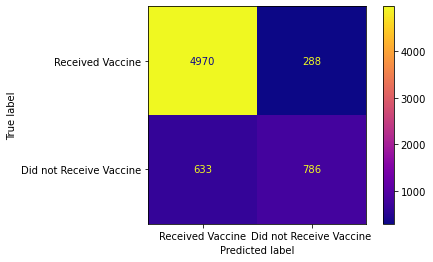

In [44]:
plot_confusion_matrix(gsl2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Multinomial Naive Bayes

In [45]:
gsm2.score(X_train2, y_train2), gsm2.score(X_test2, y_test2)

(0.8170309638516073, 0.8033254336959875)

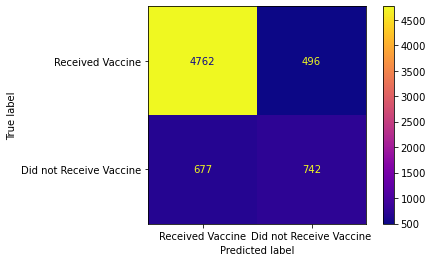

In [26]:
plot_confusion_matrix(gsm2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### <em>k</em>-NN

In [46]:
gsk2.score(X_train2, y_train2), gsk2.score(X_test2, y_test2)

(1.0, 0.8201655733965306)

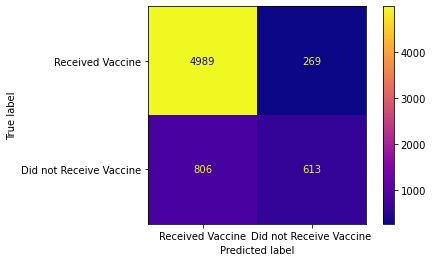

In [47]:
plot_confusion_matrix(gsk2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Random Forest Classifier

In [48]:
gsr2.score(X_train2, y_train2), gsr2.score(X_test2, y_test2)

(0.9609751555455408, 0.8863441352229201)

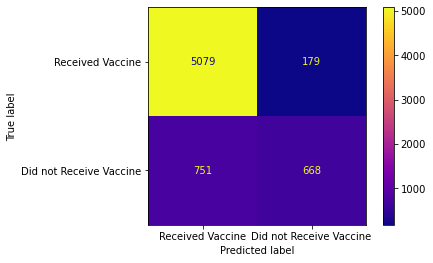

In [49]:
plot_confusion_matrix(gsr2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Results

Model | Preliminary Model | Using `seasonal_vaccine` as predictor|
------|:------------------:|:------------------------------:|
Logistic Regression| 0.855 | 0.884|
*k*-NN | 0.798 |0.820|
mNB|0.789|0.803|
Random Forest|0.854|0.886

Seasonal vaccines appear to offer a small but significant performance boost to the models, validating their dependancy.